# Liikkuvien suureiden laskenta Pandasissa

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ipywidgets as widgets
%matplotlib widget

## Luodaan parser-funktio datetime-olioiden luomiseksi päivämäärämerkkikjonoista

In [3]:
def parser(x):
    return datetime.strptime(x, '%d/%m/%Y')

## Luetaan data sisään ja eriytetään nokia omaksi dataframeksi

In [4]:
data = pd.read_csv('../data/osakkeet.csv', index_col='PVM', parse_dates=['PVM'], date_parser=parser)

data = data[::-1]
dataNokia = data[['Nokia']].copy()

## Luodaan interaktiivinen kuvaaja, jossa ikkunan kokoa voidaan vaihdella

interactive(children=(Checkbox(value=True, description='Ikkuna on vain luku'), Checkbox(value=False, descripti…

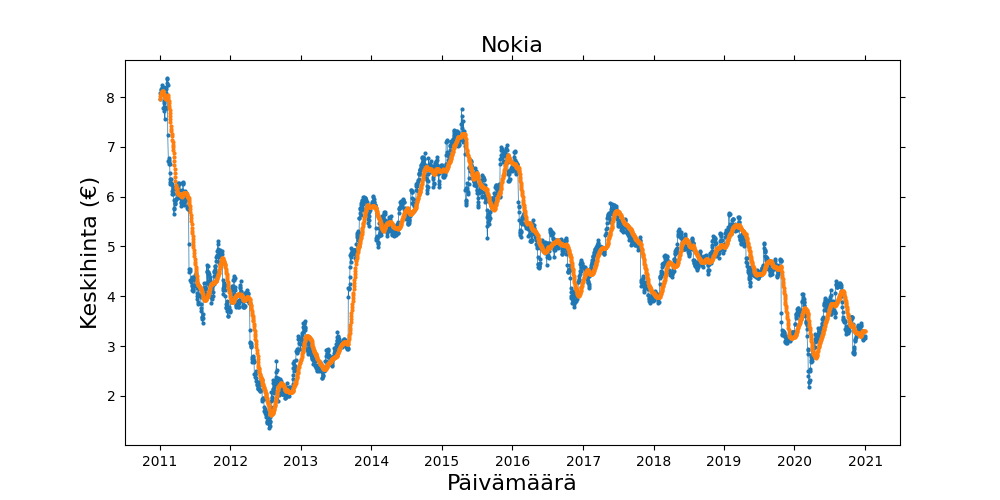

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))


def kuva(on_luku, on_keskella, ikkunan_pituus, minimi_pituus):
    ax.clear()
    ax.plot(dataNokia.index, dataNokia.Nokia,
            **{'marker': 'o',
           'linewidth': 0.5,
           'markersize': 2})
    fs = 16
    ls = 12
    ax.set_xlabel('Päivämäärä', fontsize=fs)
    ax.set_ylabel('Keskihinta (€)', fontsize=fs)
    ax.set_title('Nokia', fontsize=fs)

    if on_luku:
        y = dataNokia['Nokia'].rolling(window=ikkunan_pituus,
                                                             center=on_keskella,
                                                             min_periods=minimi_pituus).mean()
    else:
        y = dataNokia['Nokia'].rolling(window=f'{ikkunan_pituus}D',
                                                             center=on_keskella,
                                                             min_periods=minimi_pituus).mean()
    ax.plot(dataNokia.index, y,
            **{'marker': 'o',
               'linewidth': 0.5,
               'markersize': 2})


widgets.interactive(kuva, on_luku=widgets.Checkbox(value=True, description='Ikkuna on vain luku'),
                    on_keskella=widgets.Checkbox(value=False, description='Keskitä juokseva keskiarvo'),
                    ikkunan_pituus=widgets.IntSlider(value=30, min=30, max=180, description='Pituus'),
                    minimi_pituus= widgets.IntSlider(value=1, min=1, max=29, description='Minimi pituus'))


In [33]:
plt.close('all')